In [37]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

from peakfit import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test peak fit

## Implemented peak functions

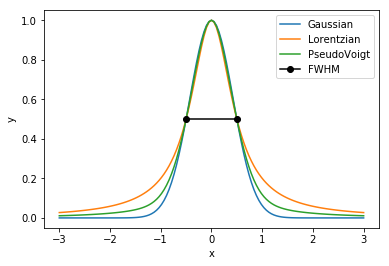

In [38]:
x = np.linspace(-3, 3, 123)

f = Gauss()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = Lorentzian()
plt.plot(x, f(x, 0, 1, 1), label=f.name);

f = PseudoVoigt()
plt.plot(x, f(x, 0, 1, 1, 0.5), label=f.name);


plt.plot([-.5, .5], [.5, .5], '-ok', label='FWHM'); # test FWHM
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Simple fit

{'x0': 0.5049974248191583, 'fwhm': 0.9353130556356093, 'amplitude': 1.0069043610667798}
{'slope': -0.0014329118494352073, 'intercept': 7.0066513746499925}


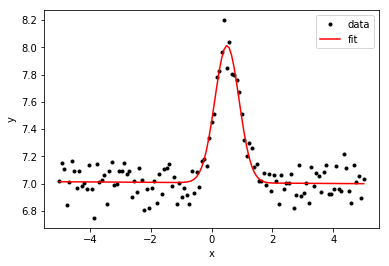

In [39]:
# Generate random data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Gauss())

# _note:_ a linear slope is by default included
# set background=None to prevent this

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## With a linear background

{'x0': 0.49972622659604465, 'fwhm': 0.9595077761930874, 'amplitude': 1.0440869354660296}
{'slope': 0.10237934135521229, 'intercept': 7.013605744543312}


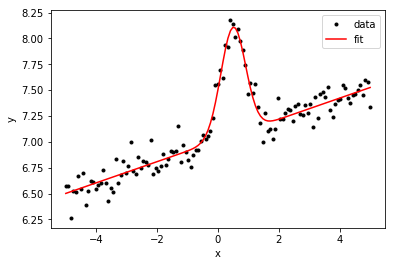

In [40]:
# Generate random data data
x = np.linspace(-5, 5, 123)
y = 7 + 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit using manual estimation of initial parameters:
results, fit = peakfit(x, y, Gauss(0, 1, 1))

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

{'x0': 0.5238113881007337, 'fwhm': 1.096678680231917, 'amplitude': 1.0435393338348449}


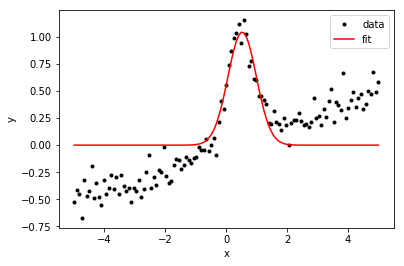

In [41]:
# Generate data
x = np.linspace(-5, 5, 123)
y = 0.1*x + 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 1)

# Fit without the linear background:
results, fit = peakfit(x, y, Gauss(0.6, 1, 1), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Multi-peak

{'x0': -1.5118181037279224, 'fwhm': 1.4845603265893201, 'amplitude': 0.9964933419091363}
{'x0': 0.505151099612857, 'fwhm': 0.9131693723898338, 'amplitude': 0.8626143650641365}
{'slope': -0.004844685227514597, 'intercept': -0.00077090580570158}


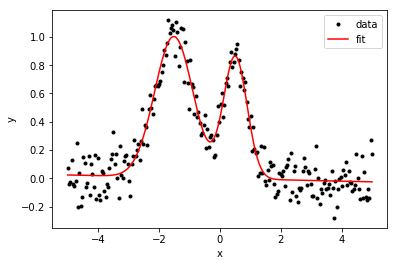

In [42]:
# Generate random data
x = np.linspace(-5, 5, 234)
y = 0.1*np.random.randn(*x.shape)
y += Gauss()(x, 0.5, 1, 0.8)
y += Gauss()(x, -1.5, 1.5, 1.)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, Sum(Gauss(-2, 1, 1), Gauss(1, 1, 1)))

for r in results:
    print(r)
    
# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();

## Pseudo Voigt

{'x0': 0.39681489265451053, 'fwhm': 0.9926900001695916, 'amplitude': 1.0104715452514421, 'eta': 0.3916575419046325}


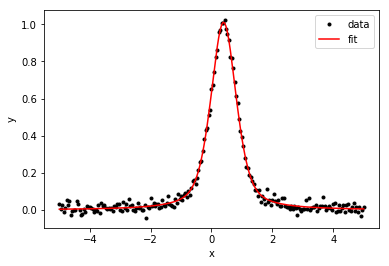

In [43]:
# Generate random data
x = np.linspace(-5, 5, 211)
y = 0.02*np.random.randn(*x.shape)
y += PseudoVoigt()(x, 0.4, 1, 1, 0.4)

# Fit using automatic estimation of initial parameters:
results, fit = peakfit(x, y, PseudoVoigt(), background=None)

for r in results:
    print(r)

# Graph
plt.plot(x, y, '.k', label='data');
plt.plot(x, fit(x), 'r-', label='fit');
plt.xlabel('x'); plt.ylabel('y'); plt.legend();